In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [1]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/dog VS Cat.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
! pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.3 MB/s eta 0:00:00


In [3]:
# import libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
import matplotlib.pyplot as plt
import keras_tuner as kt

In [4]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels = 'inferred',
    label_mode  = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels = 'inferred',
    label_mode  = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
# obtained train_ds and validation_ds are in numpy array with value ranging from 0 to 255
# so we normalize it to 0 to 1

def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Model
model = Sequential()

## CONVOLUTION LAYERS
# 1st layer
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape= (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

# 2nd layer
model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

# 3rd layer
model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

# Flatten
model.add(Flatten())

## FULLY CONNECTED LAYERS
# 4th layer
model.add(Dense(128, activation = 'relu'))

# 5th layer
model.add(Dense(64, activation = 'relu'))

# 6th layer
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile model
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'binary_crossentropy')

In [ ]:
# fit model
history0 = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 82ms/step - accuracy: 0.6057 - loss: 0.6599 - val_accuracy: 0.7446 - val_loss: 0.5262
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 69ms/step - accuracy: 0.7425 - loss: 0.5184 - val_accuracy: 0.7906 - val_loss: 0.4536
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.7923 - loss: 0.4354 - val_accuracy: 0.7736 - val_loss: 0.5149
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8516 - loss: 0.3354 - val_accuracy: 0.7744 - val_loss: 0.6008
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 69ms/step - accuracy: 0.9154 - loss: 0.2100 - val_accuracy: 0.7720 - val_loss: 0.7785
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9517 - loss: 0.1223 - val_accuracy: 0.7894 - val_loss: 0.9379
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.9715 - loss: 0.0779 - val_accuracy: 0.7864 - val_loss: 1.0074
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9825 - loss: 0.0531 - 

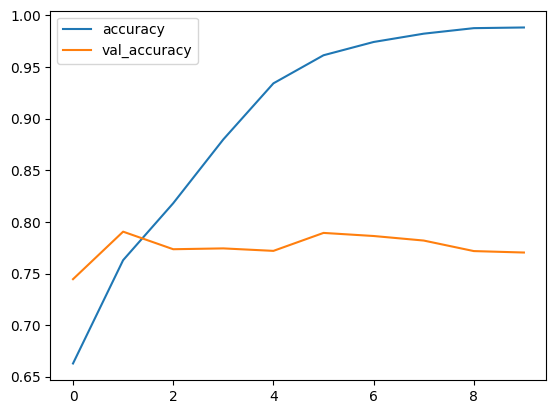

In [ ]:
plt.plot(history0.history['accuracy'],label = 'accuracy')
plt.plot(history0.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

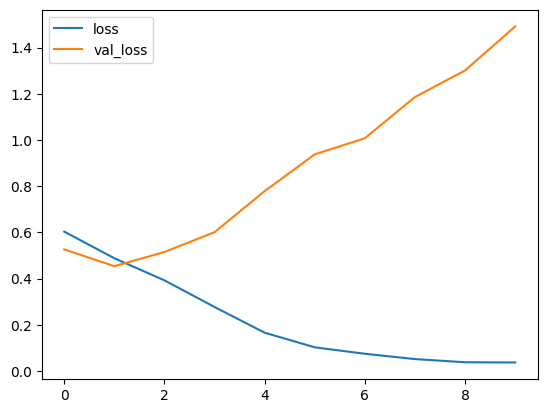

In [ ]:
plt.plot(history0.history['loss'],label = 'loss')
plt.plot(history0.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [ ]:
# overfitting is occuring so we can:-
# 1. BatchNormalization
# 2. Dropout
# 3. reduce complexity
# 4. Regularization
# 5. Hyperparameter tuning

In [ ]:
# Model
model = Sequential()


## CONVOLUTION LAYERS
# 1st layer
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape= (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

# 2nd layer
model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

# 3rd layer
model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

# Flatten
model.add(Flatten())


## FULLY CONNECTED LAYERS
# 4th layer
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))

# 5th layer
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))

# 6th layer
model.add(Dense(1, activation = 'sigmoid'))


# Compile and fit model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history1 = model.fit(train_ds,epochs = 10, validation_data = validation_ds)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.5546 - loss: 3.0162 - val_accuracy: 0.6114 - val_loss: 0.6342
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.6488 - loss: 0.6248 - val_accuracy: 0.7136 - val_loss: 0.5483
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.7230 - loss: 0.5498 - val_accuracy: 0.7654 - val_loss: 0.4804
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7655 - loss: 0.4930 - val_accuracy: 0.7538 - val_loss: 0.5261
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8109 - loss: 0.4286 - val_accuracy: 0.7986 - val_loss: 0.4465
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.8318 - loss: 0.3757 - val_accuracy: 0.8184 - val_loss: 0.4191
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 83ms/step - accuracy: 0.8620 - loss: 0.3151 - val_accuracy: 0.8094 - val_loss: 0.4217
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.8977 - loss: 0.2464 - 

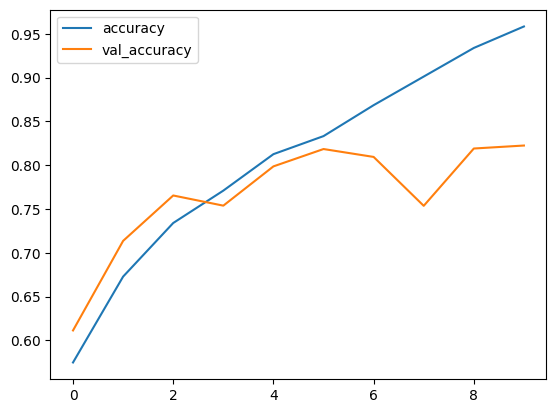

In [ ]:
plt.plot(history1.history['accuracy'],label = 'accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

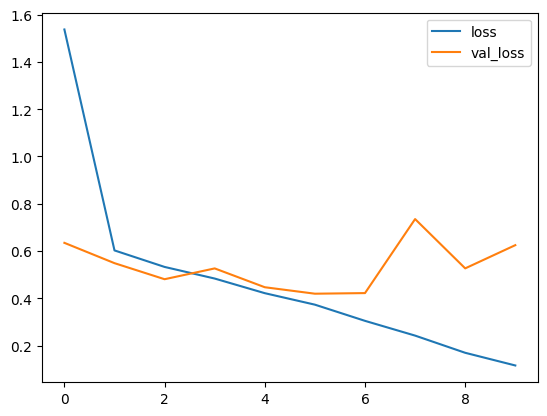

In [ ]:
plt.plot(history1.history['loss'],label = 'loss')
plt.plot(history1.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [ ]:
# Tuning
# 1. No. of hidden layer
# 2. No. of neurons in layer
# 3. activation function
# 4. optimizer
# 5. dropout ratio

In [7]:
def build_model(hp):
  model = Sequential()

  counter = 0

  # CONVOLUTION LAYERS WITH BATCH NORMALIZTION
  for i in range(hp.Int('num_convolution_layers',min_value = 1, max_value = 5)):
    if counter ==0:
      model.add(Conv2D(hp.Int('cnn_unit' + str(i), min_value = 32, max_value = 256, step = 32),
                       kernel_size = (3,3), padding = 'valid',
                       activation = hp.Choice('cnn_activation'+str(i), values = ['relu','sigmoid','tanh']),
                       input_shape = (256,256,3)
                       )
              )
      model.add(BatchNormalization())
      model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
    else:
      model.add(Conv2D(hp.Int('cnn_unit' + str(i), min_value = 32, max_value = 256, step = 32),
                       kernel_size = (3,3), padding = 'valid',
                       activation = hp.Choice('cnn_activation'+str(i), values = ['relu','sigmoid','tanh'])
                       )
              )
      model.add(BatchNormalization())
      model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
      counter += 1

  # FLATTEN LAYER
  model.add(Flatten())

  # FULLY CONNECTED LAYER
  for i in range(hp.Int('num_fully_connected_layer',min_value = 1, max_value = 5)):
    model.add(Dense(hp.Int('ann_unit'+str(i), min_value = 32, max_value = 256, step = 32),
                    activation = hp.Choice('ann_acitivation'+str(i), values = ['tanh','sigmoid','relu'])
                    )
            )
    model.add(Dropout(hp.Choice('dropout_ann'+str(i), values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7])))

  # OUTPUT LAYER
  model.add(Dense(1,activation = 'sigmoid'))


  # COMPILE MODEL
  model.compile(optimizer = hp.Choice('optimizer', values = ['adam','adagrad','sgd','nadam','rmsprop']),
                loss = 'binary_crossentropy',
                metrics = ['accuracy']
                )

  return model

In [8]:
tuner = kt.RandomSearch(build_model, objective = 'val_accuracy', max_trials = 5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
tuner.search(train_ds,epochs = 5, validation_data = validation_ds)

Trial 5 Complete [00h 15m 08s]
val_accuracy: 0.7940000295639038

Best val_accuracy So Far: 0.8145999908447266
Total elapsed time: 01h 05m 05s


In [10]:
tuner.get_best_hyperparameters()[0].values

{'num_convolution_layers': 5,
 'cnn_unit0': 192,
 'cnn_activation0': 'tanh',
 'num_fully_connected_layer': 2,
 'ann_unit0': 96,
 'ann_acitivation0': 'tanh',
 'dropout_ann0': 0.5,
 'optimizer': 'rmsprop',
 'cnn_unit1': 128,
 'cnn_activation1': 'relu',
 'ann_unit1': 256,
 'ann_acitivation1': 'relu',
 'dropout_ann1': 0.6,
 'ann_unit2': 32,
 'ann_acitivation2': 'sigmoid',
 'dropout_ann2': 0.3,
 'ann_unit3': 224,
 'ann_acitivation3': 'tanh',
 'dropout_ann3': 0.4,
 'cnn_unit2': 128,
 'cnn_activation2': 'tanh',
 'cnn_unit3': 32,
 'cnn_activation3': 'relu',
 'cnn_unit4': 32,
 'cnn_activation4': 'relu'}

In [11]:
model = tuner.get_best_models(num_models = 1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 28 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [16]:
import joblib
joblib.dump(model,'model.joblib')

['model.joblib']

In [15]:
history2 = model.fit(train_ds,epochs = 15, initial_epoch = 5, validation_data= validation_ds)

Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 187s 289ms/step - accuracy: 0.8226 - loss: 0.4021 - val_accuracy: 0.7434 - val_loss: 0.5483
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 180s 287ms/step - accuracy: 0.8464 - loss: 0.3532 - val_accuracy: 0.7676 - val_loss: 0.5084
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 180s 287ms/step - accuracy: 0.8671 - loss: 0.3179 - val_accuracy: 0.8454 - val_loss: 0.3601
Epoch 9/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 211s 302ms/step - accuracy: 0.8859 - loss: 0.2802 - val_accuracy: 0.8614 - val_loss: 0.3336
Epoch 10/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 179s 287ms/step - accuracy: 0.8972 - loss: 0.2564 - val_accuracy: 0.8452 - val_loss: 0.3767
Epoch 11/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 180s 287ms/step - accuracy: 0.9041 - loss: 0.2357 - val_accuracy: 0.8076 - val_loss: 0.4549
Epoch 12/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 287ms/step - accuracy: 0.9180 - loss: 0.2100 - val_accuracy: 0.8824 - val_loss: 0.3063
Epoch 13/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 287ms/step - accuracy: 0.92

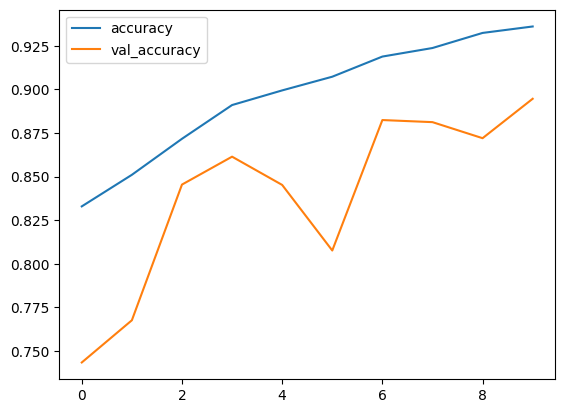

In [17]:
plt.plot(history2.history['accuracy'],label = 'accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

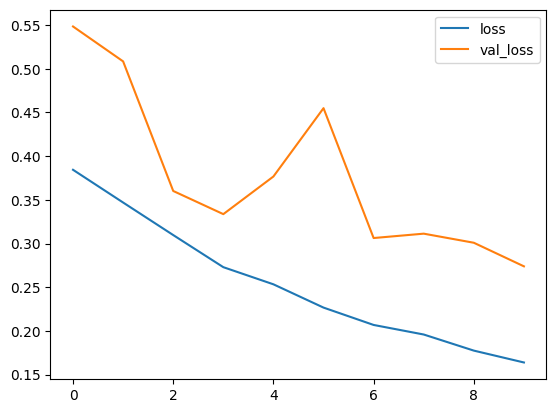

In [18]:
plt.plot(history2.history['loss'],label = 'loss')
plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [82]:
import cv2

In [95]:
# test cat image
cat_img = cv2.imread('cat.jpg')

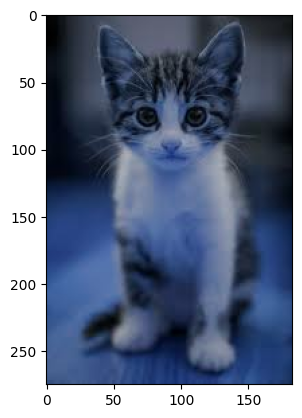

In [96]:
plt.imshow(cat_img)

In [97]:
cat_img = cv2.resize(cat_img,(256,256))

In [98]:
test_cat = cat_img.reshape((1,256,256,3))

In [99]:
output = model.predict(test_cat)
print(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.00999296]]


In [100]:
threshold = 0.5
output = (output >= threshold).astype(int)
print(output)

[[0]]


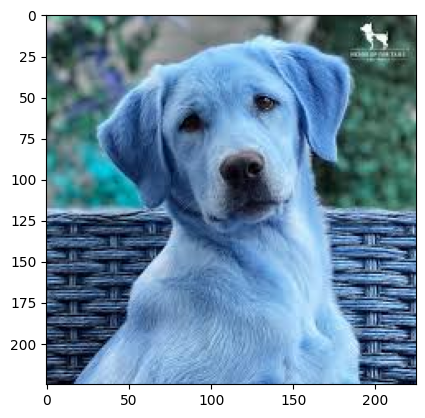

In [106]:
# test dog image
dog_img = cv2.imread('dog.jpg')
plt.imshow(dog_img)

In [107]:
dog_img.shape

(225, 225, 3)

In [108]:
dog_img = cv2.resize(dog_img,(256,256))

In [109]:
test_dog = dog_img.reshape((1,256,256,3))

In [110]:
output = model.predict(test_dog)
print(output)
output = (output >= threshold).astype(int)
print(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.9953784]]
[[1]]
